Row count= 125
UONEK.O       OPEN  HIGH   LOW  CLOSE      VOLUME  \
Date                                                
2020-01-02  1.9100  1.97  1.91  1.945     13221.0   
2020-01-03  1.8956  1.94  1.85  1.850      3273.0   
2020-01-06     NaN   NaN   NaN    NaN        78.0   
2020-01-07  1.8600  1.86  1.86  1.860       329.0   
2020-01-08  1.9500  1.96  1.95  1.950     10435.0   
...            ...   ...   ...    ...         ...   
2020-06-17  6.8000  6.84  2.38  2.650  89815761.0   
2020-06-18  2.3000  4.28  2.15  3.630  85554190.0   
2020-06-19  4.9700  5.63  3.76  4.150  73086713.0   
2020-06-22  3.4500  3.50  2.75  2.900  15910192.0   
2020-06-23  3.0800  3.35  2.69  2.870  10662911.0   

UONEK.O     TR.TRESGCCONTROVERSIESSCOREGRADE  
Date                                          
2020-01-02                               NaN  
2020-01-03                               NaN  
2020-01-06                               NaN  
2020-01-07                               NaN  
2020-01-08   

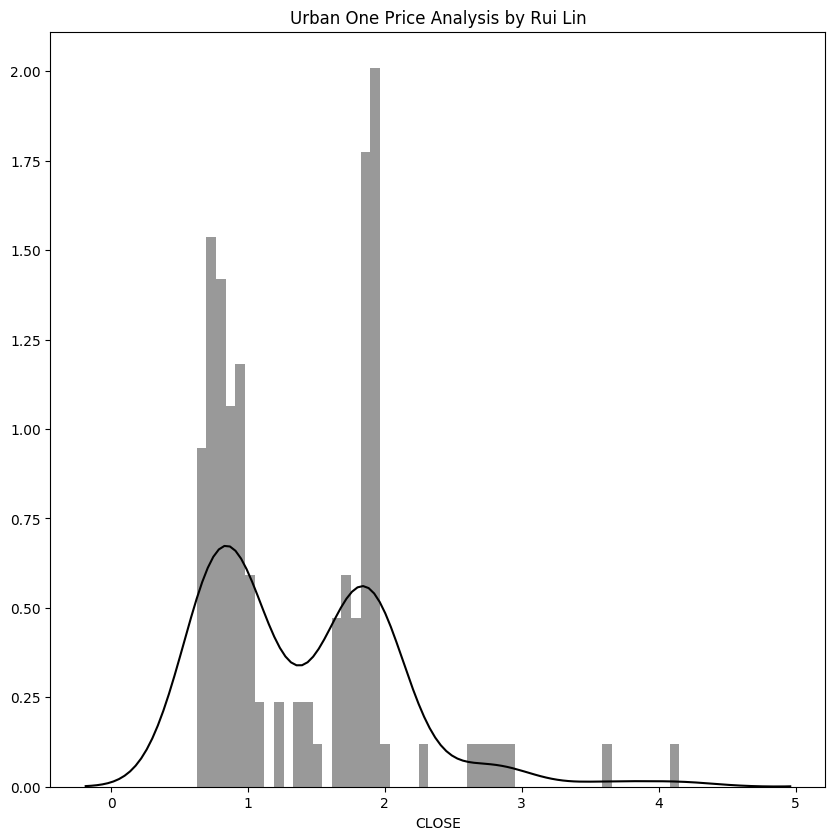

,Instrument,CF_CLOSE,CF_NAME,ESG Controversies Score Grade
0,AMS,1.9600,AMER SHARED HOSP,
1,AXSM.O,76.3600,AXME THERAPUTICS,A+
2,GBT.O,66.5000,GLOBL BLD THRPTS,A+
3,PING.K,31.4400,PING IDENITY HLD,
4,RLJ,9.4400,RLJ LODGING,A+
5,SEGI.PK,0.0003,SYCAMORE ENT GRP,
6,UONEK.O,1.6500,URBAN ONE INC D,


In [1]:
import eikon as ek
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#import data for Urban One, Inc. is a Silver Spring, Maryland-based American media conglomerate. 
#Founded in 1980 by Cathy Hughes, the company primarily operates media properties targeting African Americans.
#ek.set_app_key('DEFAULT_CODE_BOOK_APP_KEY') is the default key. Python API users need to generate their own key for script to work

try:
    ek.set_app_key('DEFAULT_CODE_BOOK_APP_KEY')    
    itemName="UONEK.O"
    chartTitle="Urban One Price Analysis by Rui Lin"
    dateStart="2020-01-01"
    dateEnd=datetime.now()

# Request time series proxy data with adjusted close price for daily for Urban One.
# TR.TRESGCControversiesScoreGrade is a Refinitiv measured 'ControversiesScoreGrade'is there a score for this firm ?
#  Well... you can see there isn't one for this company. 
    df_adjustOHLC=ek.get_timeseries(itemName,fields=["Open","High","Low","Close","Volume","TR.TRESGCControversiesScoreGrade" ], start_date = dateStart , 
                                end_date = dateEnd , interval='daily', corax = 'adjusted' )
    
except ek.EikonError as ex:
    print('Refinitiv Workspace Error')
    print(ex)
except Exception as ex:
    print(ex)
    

# print only the first 168 days of the year until June 17th BLM day ** weekends are included. 
#Head function lets you only grab rows so 168 - 48 weekends = 120 
print('Row count=',len(df_adjustOHLC.index))
print(df_adjustOHLC.head(120))

    
# Use seaborn distplot to check spread of voality 
plt.figure(figsize=(10,10),dpi=100)
df=df_adjustOHLC[['CLOSE','VOLUME']].loc['2020-01-01':datetime.now(),:]
graph=sns.distplot(df['CLOSE'].dropna(), bins=50, color='black')
graph.set_title(chartTitle)
plt.show()


# Are there other black stocks that do have a TRESGCControversiesScoreGrade? Here are all of them.
df, err = ek.get_data(
    instruments = [
        'AMS',
        'AXSM.O',
        'GBT.O',
        'PING.K',
        'RLJ',
        'SEGI.PK',
        'UONEK.O'
    ],
    fields = [
        'CF_CLOSE',
        'CF_NAME',
        'TR.TRESGCControversiesScoreGrade'
    ]
)

display(df)
